# Student Dropout Classification

This notebook follows the classification methodology from Chapter 3 (MNIST Classification) adapted for the Student Dropout dataset.

## Dataset Overview
- **Dataset**: Student Dropout and Academic Success Dataset
- **Dataset Path**: `Classification/students_dropout_academic_success.csv`
- **Target Classes**: 
  - Dropout (1421 samples)
  - Enrolled (794 samples)
  - Graduate (2209 samples)
- **Features**: 36 features including academic performance, demographics, and enrollment information
- **Total Samples**: 4424

## Notebook Structure
This notebook contains 16 comprehensive steps covering:
1. Data loading and exploration
2. Train/test splitting
3. Binary classification (Dropout detector)
4. Cross-validation evaluation
5. Confusion matrix analysis
6. Precision, Recall, F1 metrics
7. Precision-Recall trade-off
8. ROC curve analysis
9. Multiclass classification
10. Feature scaling
11. Error analysis
12. Final model evaluation
13. Multilabel classification
14. Model comparison
15. Hyperparameter tuning
16. Visualization (2D projection)


## Step 1: Load and Explore the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('Classification/students_dropout_academic_success.csv')

# Explore dataset shape
print(f"Dataset shape: {df.shape}")
print(f"Features: {df.shape[1] - 1}")  # Excluding target column
print(f"Samples: {df.shape[0]}")

# Display basic information
print("\n" + "="*50)
print("Dataset Info:")
print("="*50)
df.info()

# Display first few rows
print("\n" + "="*50)
print("First 5 rows:")
print("="*50)
df.head()


Dataset shape: (4424, 37)
Features: 36
Samples: 4424

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          44

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Target variable distribution:
target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Target variable percentages:
target
Graduate    49.932188
Dropout     32.120253
Enrolled    17.947559
Name: proportion, dtype: float64


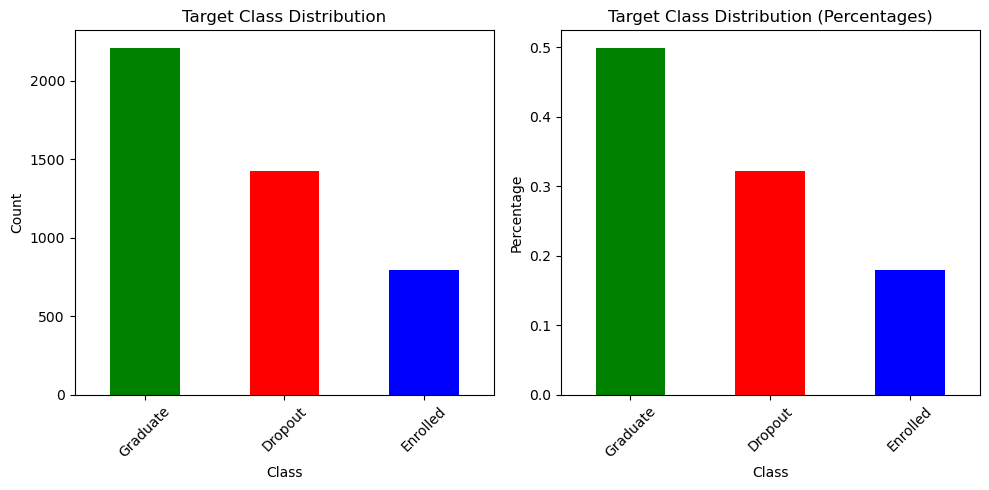


Missing Values:
No missing values found!


In [2]:
# Explore target variable distribution
print("Target variable distribution:")
print(df['target'].value_counts())
print("\nTarget variable percentages:")
print(df['target'].value_counts(normalize=True) * 100)

# Visualize target distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['target'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Target Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
df['target'].value_counts(normalize=True).plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Target Class Distribution (Percentages)')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Check for missing values
print("\n" + "="*50)
print("Missing Values:")
print("="*50)
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values found!")


In [3]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"\nTarget classes: {y.unique()}")
print(f"Number of classes: {len(y.unique())}")

# Display feature names
print(f"\nFeature columns ({len(X.columns)}):")
for i, col in enumerate(X.columns, 1):
    print(f"{i:2d}. {col}")


X shape: (4424, 36)
y shape: (4424,)

Target classes: ['Dropout' 'Graduate' 'Enrolled']
Number of classes: 3

Feature columns (36):
 1. Marital Status
 2. Application mode
 3. Application order
 4. Course
 5. Daytime/evening attendance
 6. Previous qualification
 7. Previous qualification (grade)
 8. Nacionality
 9. Mother's qualification
10. Father's qualification
11. Mother's occupation
12. Father's occupation
13. Admission grade
14. Displaced
15. Educational special needs
16. Debtor
17. Tuition fees up to date
18. Gender
19. Scholarship holder
20. Age at enrollment
21. International
22. Curricular units 1st sem (credited)
23. Curricular units 1st sem (enrolled)
24. Curricular units 1st sem (evaluations)
25. Curricular units 1st sem (approved)
26. Curricular units 1st sem (grade)
27. Curricular units 1st sem (without evaluations)
28. Curricular units 2nd sem (credited)
29. Curricular units 2nd sem (enrolled)
30. Curricular units 2nd sem (evaluations)
31. Curricular units 2nd sem (app

## Step 2: Split Data into Train and Test Sets

In [4]:
# Using stratified split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Ensures same class distribution in train and test
)

print(f"Training set size: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")

print("\nTraining set class distribution:")
print(y_train.value_counts())
print("\nTest set class distribution:")
print(y_test.value_counts())


Training set size: 3539 (80.0%)
Test set size: 885 (20.0%)

Training set class distribution:
target
Graduate    1767
Dropout     1137
Enrolled     635
Name: count, dtype: int64

Test set class distribution:
target
Graduate    442
Dropout     284
Enrolled    159
Name: count, dtype: int64


## Step 3: Train a Binary Classifier (Dropout-detector)

In [5]:
# Similar to the "5-detector" in MNIST, we'll create a "Dropout-detector"
from sklearn.linear_model import SGDClassifier

# Create binary labels for "Dropout" vs "not-Dropout"
y_train_dropout = (y_train == 'Dropout')
y_test_dropout = (y_test == 'Dropout')

print(f"Training set - Dropout: {y_train_dropout.sum()}, Not-Dropout: {(~y_train_dropout).sum()}")
print(f"Test set - Dropout: {y_test_dropout.sum()}, Not-Dropout: {(~y_test_dropout).sum()}")

# Train SGD Classifier
sgd_clf = SGDClassifier(random_state=42, max_iter=1000)
sgd_clf.fit(X_train, y_train_dropout)

# Test prediction on first instance
some_student = X_train.iloc[0:1]
prediction = sgd_clf.predict(some_student)
print(f"\nPrediction for first student: {'Dropout' if prediction[0] else 'Not-Dropout'}")
print(f"Actual label: {y_train.iloc[0]}")


Training set - Dropout: 1137, Not-Dropout: 2402
Test set - Dropout: 284, Not-Dropout: 601

Prediction for first student: Not-Dropout
Actual label: Graduate


## Step 4: Evaluate Performance with Cross-Validation

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

# Cross-validation accuracy for SGD Classifier
print("Evaluating SGD Classifier with Cross-Validation...")
cv_scores = cross_val_score(sgd_clf, X_train, y_train_dropout, cv=3, scoring="accuracy")
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Compare with a dummy classifier (baseline)
print("\n" + "="*50)
print("Comparing with Dummy Classifier (baseline):")
print("="*50)
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train_dropout)
dummy_cv_scores = cross_val_score(dummy_clf, X_train, y_train_dropout, cv=3, scoring="accuracy")
print(f"Dummy classifier CV scores: {dummy_cv_scores}")
print(f"Mean dummy accuracy: {dummy_cv_scores.mean():.4f}")
print(f"\nImprovement over baseline: {(cv_scores.mean() - dummy_cv_scores.mean())*100:.2f}%")


Evaluating SGD Classifier with Cross-Validation...
Cross-validation scores: [0.33559322 0.61440678 0.68447837]
Mean CV accuracy: 0.5448 (+/- 0.3014)

Comparing with Dummy Classifier (baseline):
Dummy classifier CV scores: [0.67881356 0.67881356 0.67854114]
Mean dummy accuracy: 0.6787

Improvement over baseline: -13.39%


## Step 5: Analyze with Confusion Matrix

Confusion Matrix:
[[1225 1177]
 [ 434  703]]

Confusion Matrix Interpretation:
True Negatives (TN): 1225 - Correctly predicted as 'Not-Dropout'
False Positives (FP): 1177 - Incorrectly predicted as 'Dropout' (Type I error)
False Negatives (FN): 434 - Incorrectly predicted as 'Not-Dropout' (Type II error)
True Positives (TP): 703 - Correctly predicted as 'Dropout'


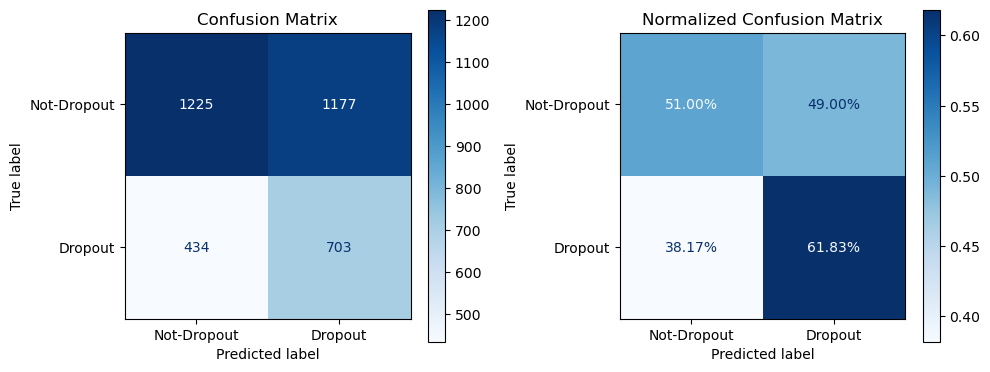

In [7]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions via cross-validation
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_dropout, cv=3)

# Confusion matrix
cm = confusion_matrix(y_train_dropout, y_train_pred)
print("Confusion Matrix:")
print(cm)
print("\nConfusion Matrix Interpretation:")
print(f"True Negatives (TN): {cm[0, 0]} - Correctly predicted as 'Not-Dropout'")
print(f"False Positives (FP): {cm[0, 1]} - Incorrectly predicted as 'Dropout' (Type I error)")
print(f"False Negatives (FN): {cm[1, 0]} - Incorrectly predicted as 'Not-Dropout' (Type II error)")
print(f"True Positives (TP): {cm[1, 1]} - Correctly predicted as 'Dropout'")

# Visualize confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Standard confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not-Dropout', 'Dropout'])
disp.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title('Confusion Matrix')

# Normalized confusion matrix - FIXED: use from_predictions with normalize parameter and ax
disp_norm = ConfusionMatrixDisplay.from_predictions(y_train_dropout, y_train_pred,
                                                    display_labels=['Not-Dropout', 'Dropout'],
                                                    normalize='true',
                                                    ax=axes[1],
                                                    cmap='Blues', values_format='.2%')
axes[1].set_title('Normalized Confusion Matrix')

plt.tight_layout()
plt.show()


## Step 6: Calculate Precision, Recall, and F1 Score

In [8]:
# Step 6: Calculate Precision, Recall, and F1 Score
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_train_dropout, y_train_pred)
recall = recall_score(y_train_dropout, y_train_pred)
f1 = f1_score(y_train_dropout, y_train_pred)

print("Performance Metrics:")
print("="*50)
print(f"Precision: {precision:.4f}")
print(f"  → When the model predicts 'Dropout', it is correct {precision*100:.2f}% of the time")
print(f"\nRecall: {recall:.4f}")
print(f"  → The model detects {recall*100:.2f}% of all actual dropouts")
print(f"\nF1 Score: {f1:.4f}")
print(f"  → Harmonic mean of precision and recall")

# Calculate manually to verify understanding
TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
precision_manual = TP / (TP + FP) if (TP + FP) > 0 else 0
recall_manual = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_manual = 2 * (precision_manual * recall_manual) / (precision_manual + recall_manual) if (precision_manual + recall_manual) > 0 else 0

print("\n" + "="*50)
print("Manual Calculation Verification:")
print("="*50)
print(f"Precision = TP/(TP+FP) = {TP}/({TP}+{FP}) = {precision_manual:.4f}")
print(f"Recall = TP/(TP+FN) = {TP}/({TP}+{FN}) = {recall_manual:.4f}")
print(f"F1 = 2 × (Precision × Recall)/(Precision + Recall) = {f1_manual:.4f}")


Performance Metrics:
Precision: 0.3739
  → When the model predicts 'Dropout', it is correct 37.39% of the time

Recall: 0.6183
  → The model detects 61.83% of all actual dropouts

F1 Score: 0.4660
  → Harmonic mean of precision and recall

Manual Calculation Verification:
Precision = TP/(TP+FP) = 703/(703+1177) = 0.3739
Recall = TP/(TP+FN) = 703/(703+434) = 0.6183
F1 = 2 × (Precision × Recall)/(Precision + Recall) = 0.4660


## Step 7: Precision-Recall Trade-off Analysis

Computing decision scores via cross-validation...


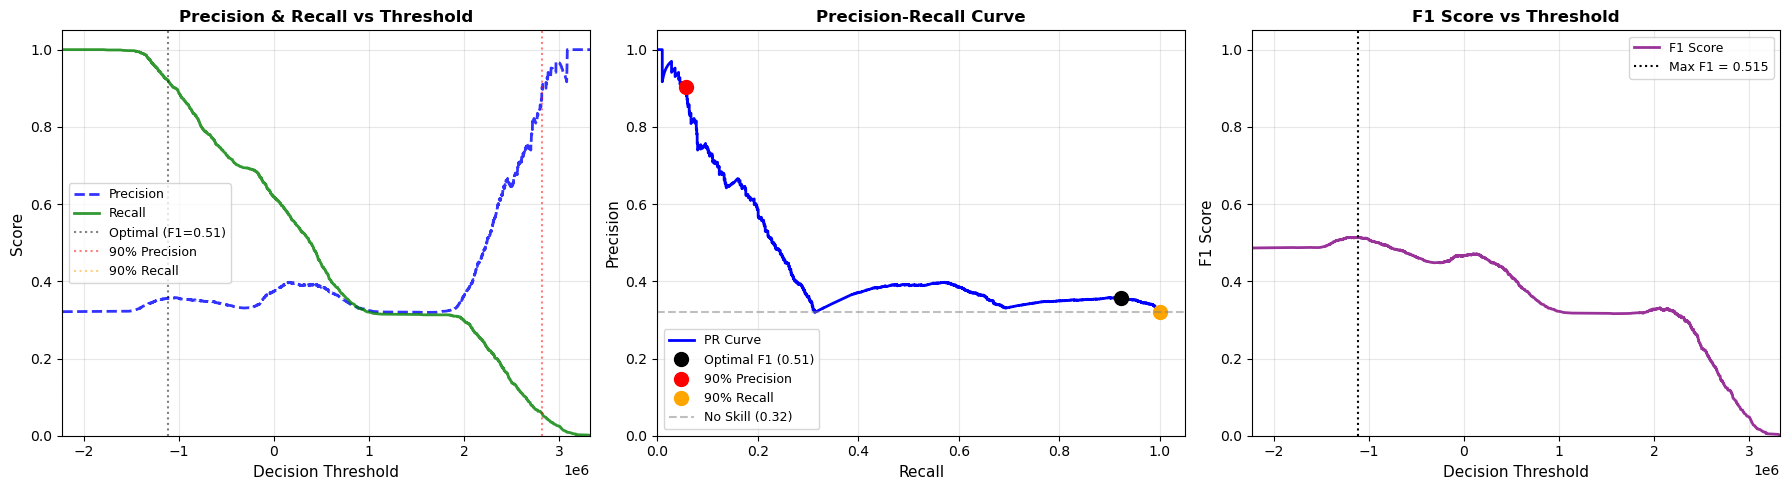

PRECISION-RECALL ANALYSIS SUMMARY

Dataset Statistics:
  Positive class ratio: 0.3213
  Number of thresholds evaluated: 3539
  Threshold range: [-2222481.25, 3320923.21]

1. Optimal F1 Score Point:
   Threshold: -1112719.7690
   Precision: 0.3569
   Recall:    0.9217
   F1 Score:  0.5146

2. High Precision Configuration (≥90%):
   Threshold: 2815865.1415
   Precision: 0.9028
   Recall:    0.0572

3. High Recall Configuration (≥90%):
   Threshold: -2222481.2512
   Precision: 0.3213
   Recall:    1.0000

PREDICTION PERFORMANCE WITH DIFFERENT THRESHOLDS

Default (0):
  Threshold: 0.0000
  Precision: 0.3739
  Recall:    0.6183
  F1 Score:  0.4660

Optimal F1:
  Threshold: -1112719.7690
  Precision: 0.3569
  Recall:    0.9217
  F1 Score:  0.5146

90% Precision:
  Threshold: 2815865.1415
  Precision: 0.9028
  Recall:    0.0572
  F1 Score:  0.1075

90% Recall:
  Threshold: -2222481.2512
  Precision: 0.3213
  Recall:    1.0000
  F1 Score:  0.4863


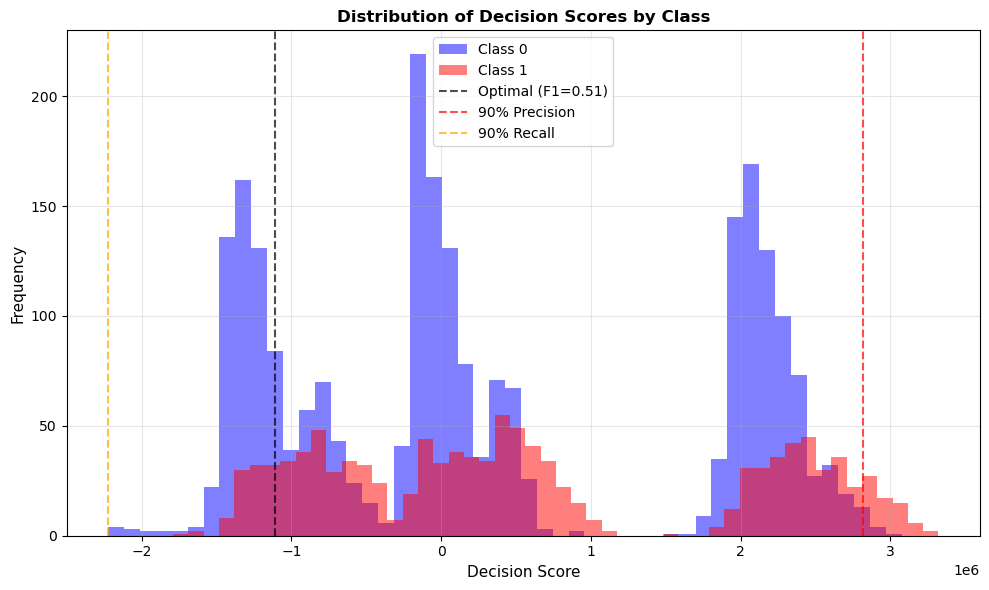

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

# Get decision scores from your SGD classifier
print("Computing decision scores via cross-validation...")
y_scores = cross_val_predict(sgd_clf, X_train, y_train_dropout, cv=3, 
                             method="decision_function")

# Calculate precision-recall for all possible thresholds
precisions, recalls, thresholds = precision_recall_curve(y_train_dropout, y_scores)

# Find optimal thresholds for different scenarios
# 1. Threshold that maximizes F1 score
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)  # Add small epsilon to avoid division by zero
optimal_idx = np.nanargmax(f1_scores)  # Use nanargmax to ignore NaN values
optimal_threshold = thresholds[optimal_idx]
optimal_precision = precisions[optimal_idx]
optimal_recall = recalls[optimal_idx]
optimal_f1 = f1_scores[optimal_idx]

# 2. Threshold for high precision (90%)
idx_90_precision = (precisions >= 0.90).argmax()
threshold_90_precision = thresholds[idx_90_precision]
precision_90 = precisions[idx_90_precision]
recall_90 = recalls[idx_90_precision]

# 3. Threshold for high recall (90%)
idx_90_recall = (recalls >= 0.90).argmax()
threshold_90_recall = thresholds[idx_90_recall] if idx_90_recall < len(thresholds) else thresholds[-1]
precision_90_recall = precisions[idx_90_recall]
recall_90_recall = recalls[idx_90_recall]

# Create the visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Precision and Recall vs Threshold
ax1 = axes[0]
ax1.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2, alpha=0.8)
ax1.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2, alpha=0.8)

# Mark optimal points
ax1.axvline(x=optimal_threshold, color='k', linestyle=':', alpha=0.5, 
            label=f'Optimal (F1={optimal_f1:.2f})')
ax1.axvline(x=threshold_90_precision, color='r', linestyle=':', alpha=0.5, 
            label=f'90% Precision')
ax1.axvline(x=threshold_90_recall, color='orange', linestyle=':', alpha=0.5, 
            label=f'90% Recall')

ax1.set_xlabel("Decision Threshold", fontsize=11)
ax1.set_ylabel("Score", fontsize=11)
ax1.set_title("Precision & Recall vs Threshold", fontsize=12, fontweight='bold')
ax1.legend(loc="center left", fontsize=9)
ax1.set_ylim([0, 1.05])
ax1.grid(True, alpha=0.3)
ax1.set_xlim([thresholds.min(), thresholds.max()])

# Plot 2: Precision vs Recall Curve
ax2 = axes[1]
ax2.plot(recalls, precisions, "b-", linewidth=2, label="PR Curve")

# Mark the optimal F1 point
ax2.plot(optimal_recall, optimal_precision, "ko", markersize=10, 
         label=f'Optimal F1 ({optimal_f1:.2f})')

# Mark the high precision point
ax2.plot(recall_90, precision_90, "ro", markersize=10, 
         label=f'90% Precision')

# Mark the high recall point
ax2.plot(recall_90_recall, precision_90_recall, "o", color='orange', markersize=10, 
         label=f'90% Recall')

# Add no-skill line (precision = positive class ratio)
no_skill = len(y_train_dropout[y_train_dropout==1]) / len(y_train_dropout)
ax2.axhline(y=no_skill, color='gray', linestyle='--', alpha=0.5, 
            label=f'No Skill ({no_skill:.2f})')

ax2.set_xlabel("Recall", fontsize=11)
ax2.set_ylabel("Precision", fontsize=11)
ax2.set_title("Precision-Recall Curve", fontsize=12, fontweight='bold')
ax2.legend(loc="lower left", fontsize=9)
ax2.grid(True, alpha=0.3)
ax2.set_xlim([0, 1.05])
ax2.set_ylim([0, 1.05])

# Plot 3: F1 Score vs Threshold
ax3 = axes[2]
ax3.plot(thresholds, f1_scores[:-1], "purple", linewidth=2, label="F1 Score", alpha=0.8)
ax3.axvline(x=optimal_threshold, color='k', linestyle=':', 
            label=f'Max F1 = {optimal_f1:.3f}')

ax3.set_xlabel("Decision Threshold", fontsize=11)
ax3.set_ylabel("F1 Score", fontsize=11)
ax3.set_title("F1 Score vs Threshold", fontsize=12, fontweight='bold')
ax3.legend(loc="upper right", fontsize=9)
ax3.grid(True, alpha=0.3)
ax3.set_xlim([thresholds.min(), thresholds.max()])
ax3.set_ylim([0, 1.05])

plt.tight_layout()
plt.show()

# Print summary statistics
print("=" * 60)
print("PRECISION-RECALL ANALYSIS SUMMARY")
print("=" * 60)
print(f"\nDataset Statistics:")
print(f"  Positive class ratio: {no_skill:.4f}")
print(f"  Number of thresholds evaluated: {len(thresholds)}")
print(f"  Threshold range: [{thresholds.min():.2f}, {thresholds.max():.2f}]")

print(f"\n1. Optimal F1 Score Point:")
print(f"   Threshold: {optimal_threshold:.4f}")
print(f"   Precision: {optimal_precision:.4f}")
print(f"   Recall:    {optimal_recall:.4f}")
print(f"   F1 Score:  {optimal_f1:.4f}")

print(f"\n2. High Precision Configuration (≥90%):")
print(f"   Threshold: {threshold_90_precision:.4f}")
print(f"   Precision: {precision_90:.4f}")
print(f"   Recall:    {recall_90:.4f}")

print(f"\n3. High Recall Configuration (≥90%):")
print(f"   Threshold: {threshold_90_recall:.4f}")
print(f"   Precision: {precision_90_recall:.4f}")
print(f"   Recall:    {recall_90_recall:.4f}")

# Calculate and display predictions with different thresholds
print(f"\n" + "=" * 60)
print("PREDICTION PERFORMANCE WITH DIFFERENT THRESHOLDS")
print("=" * 60)

thresholds_to_test = [
    ("Default (0)", 0),
    ("Optimal F1", optimal_threshold),
    ("90% Precision", threshold_90_precision),
    ("90% Recall", threshold_90_recall)
]

for name, threshold in thresholds_to_test:
    y_pred = (y_scores >= threshold)
    precision = precision_score(y_train_dropout, y_pred, zero_division=0)
    recall = recall_score(y_train_dropout, y_pred, zero_division=0)
    f1 = f1_score(y_train_dropout, y_pred, zero_division=0)
    
    print(f"\n{name}:")
    print(f"  Threshold: {threshold:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1 Score:  {f1:.4f}")

# Optional: Show the distribution of decision scores
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(y_scores[y_train_dropout == 0], bins=50, alpha=0.5, label='Class 0', color='blue')
ax.hist(y_scores[y_train_dropout == 1], bins=50, alpha=0.5, label='Class 1', color='red')

# Add threshold lines
ax.axvline(x=optimal_threshold, color='k', linestyle='--', 
           label=f'Optimal (F1={optimal_f1:.2f})', alpha=0.7)
ax.axvline(x=threshold_90_precision, color='r', linestyle='--', 
           label=f'90% Precision', alpha=0.7)
ax.axvline(x=threshold_90_recall, color='orange', linestyle='--', 
           label=f'90% Recall', alpha=0.7)

ax.set_xlabel("Decision Score", fontsize=11)
ax.set_ylabel("Frequency", fontsize=11)
ax.set_title("Distribution of Decision Scores by Class", fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 8: ROC Curve Analysis

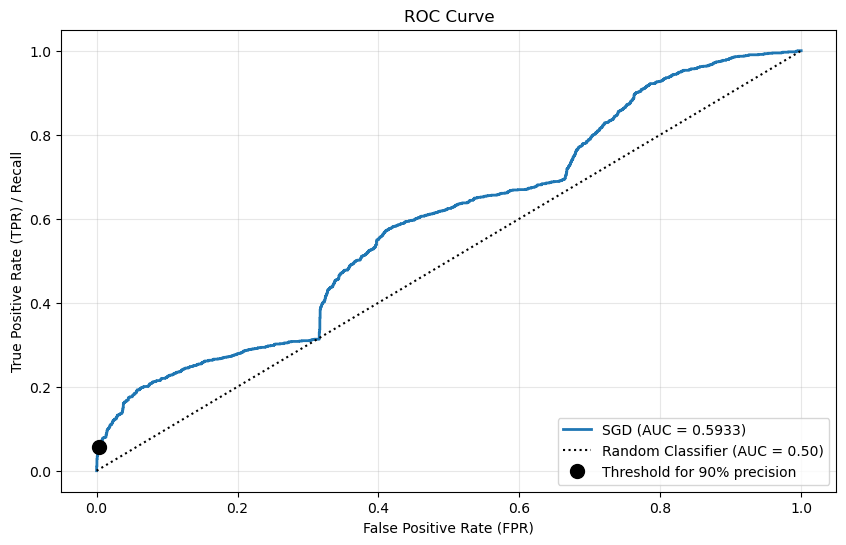

ROC AUC Score: 0.5933
  → A perfect classifier has AUC = 1.0
  → A random classifier has AUC = 0.5
  → Our classifier: 0.5933 (Poor)


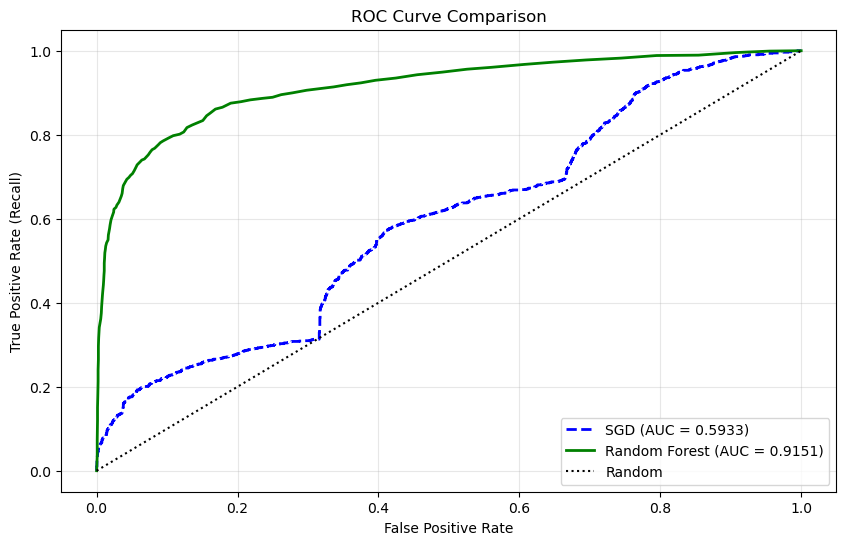

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_train_dropout, y_scores)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, linewidth=2, label=f"SGD (AUC = {roc_auc_score(y_train_dropout, y_scores):.4f})")
plt.plot([0, 1], [0, 1], 'k:', label="Random Classifier (AUC = 0.50)")

# Mark the point for 90% precision
idx_for_threshold_at_90 = (thresholds_roc <= threshold_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]
plt.plot([fpr_90], [tpr_90], "ko", markersize=10, label="Threshold for 90% precision")

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR) / Recall")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# ROC AUC score
roc_auc = roc_auc_score(y_train_dropout, y_scores)
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"  → A perfect classifier has AUC = 1.0")
print(f"  → A random classifier has AUC = 0.5")
print(f"  → Our classifier: {roc_auc:.4f} ({'Good' if roc_auc > 0.8 else 'Fair' if roc_auc > 0.6 else 'Poor'})")

# Compare with Random Forest
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42, n_estimators=100)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_dropout, cv=3,
                                     method="predict_proba")
y_scores_forest = y_probas_forest[:, 1]  # probability of positive class
fpr_forest, tpr_forest, _ = roc_curve(y_train_dropout, y_scores_forest)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, "b--", linewidth=2, label=f"SGD (AUC = {roc_auc:.4f})")
plt.plot(fpr_forest, tpr_forest, "g-", linewidth=2, 
         label=f"Random Forest (AUC = {roc_auc_score(y_train_dropout, y_scores_forest):.4f})")
plt.plot([0, 1], [0, 1], 'k:', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()


## Step 9: Train a Multiclass Classifier

MULTICLASS CLASSIFICATION - COMPARING DIFFERENT STRATEGIES

1. SUPPORT VECTOR CLASSIFIER STRATEGIES

a) SVC with One-vs-One (Default):
   Accuracy: 0.7660
   Number of classifiers: 3 classes → 3 binary classifiers

b) SVC with explicit OneVsOneClassifier wrapper:
   Accuracy: 0.7680

c) SVC with One-vs-Rest (OvR):
   Accuracy: 0.7580
   Number of classifiers: 3 binary classifiers

2. SGD CLASSIFIER STRATEGIES

a) SGD with One-vs-Rest (Default):
   Accuracy: 0.7356
   Number of classifiers: 3 binary classifiers

b) SGD with explicit OneVsRestClassifier wrapper:
   Accuracy: 0.7266

c) SGD with One-vs-One (OvO):
   Accuracy: 0.7175
   Number of classifiers: 3 classes → 3 binary classifiers

3. DECISION SCORES COMPARISON FOR A SINGLE SAMPLE

Sample student (index 0):
  True label: Graduate

SVC (OvO):
  Prediction: Graduate
  Decision scores shape: (1, 3)
  Decision scores (one per class):
    Dropout: -0.2572
    Enrolled: 0.8779
    Graduate: 2.2661

SVC (OvO wrapped):
  Prediction: Gra

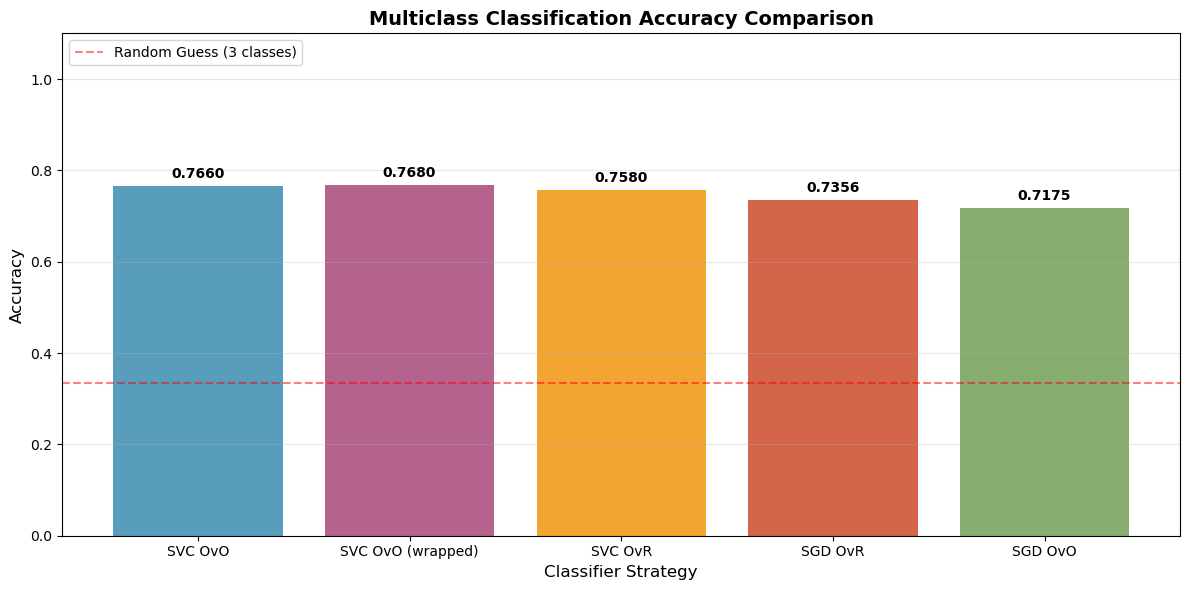


5. DETAILED PERFORMANCE ANALYSIS FOR BEST CLASSIFIER

Best classifier: SVC OvO (wrapped) (Accuracy: 0.7680)

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.85      0.68      0.76       284
    Graduate       0.48      0.43      0.46       159
    Enrolled       0.80      0.93      0.86       442

    accuracy                           0.76       885
   macro avg       0.71      0.68      0.69       885
weighted avg       0.76      0.76      0.75       885



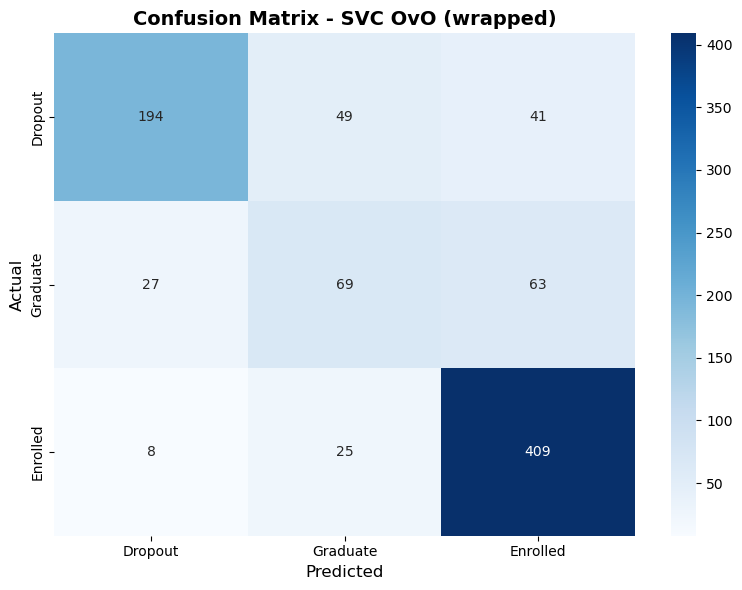


6. CROSS-VALIDATION COMPARISON (Using subset for speed)
SVC OvO:
  CV Accuracy: 0.7535 (+/- 0.0112)
  Individual folds: [0.74812594 0.75112444 0.76126126]
SVC OvR:
  CV Accuracy: 0.7440 (+/- 0.0027)
  Individual folds: [0.74212894 0.74512744 0.74474474]
SGD OvR:
  CV Accuracy: 0.7240 (+/- 0.0402)
  Individual folds: [0.69565217 0.73613193 0.74024024]
SGD OvO:
  CV Accuracy: 0.7340 (+/- 0.0252)
  Individual folds: [0.73913043 0.71664168 0.74624625]

SUMMARY

Key Insights:
1. SVC defaults to OvO, SGD defaults to OvR
2. OvO creates more classifiers but can be more accurate for some datasets
3. OvR is faster to train but may struggle with imbalanced classes
4. Wrapping classifiers explicitly gives same results as built-in defaults

Recommendation:
Based on accuracy, use: SVC OvO (wrapped)
Based on cross-validation: SVC OvO


In [11]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Using existing train/test splits from Step 2
# Note: X_train, X_test, y_train, y_test are already defined from Step 2

# Scale the data (important for SVM and SGD)
# Create a new scaler for this step (will be reused in Step 10)
scaler_multiclass = StandardScaler()
X_train_scaled = scaler_multiclass.fit_transform(X_train)
X_test_scaled = scaler_multiclass.transform(X_test)

print("=" * 70)
print("MULTICLASS CLASSIFICATION - COMPARING DIFFERENT STRATEGIES")
print("=" * 70)

# ============================================================================
# 1. SVC with different strategies
# ============================================================================
print("\n" + "="*50)
print("1. SUPPORT VECTOR CLASSIFIER STRATEGIES")
print("="*50)

# a) SVC with default OvO
print("\na) SVC with One-vs-One (Default):")
svc_ovo = SVC(random_state=42, probability=True, kernel='linear')  # Using linear for speed
svc_ovo.fit(X_train_scaled[:3000], y_train[:3000])  # Using subset for speed
svc_ovo_pred = svc_ovo.predict(X_test_scaled[:500])
svc_ovo_acc = accuracy_score(y_test[:500], svc_ovo_pred)
print(f"   Accuracy: {svc_ovo_acc:.4f}")
print(f"   Number of classifiers: {len(svc_ovo.classes_)} classes → {len(svc_ovo.classes_)*(len(svc_ovo.classes_)-1)//2} binary classifiers")

# b) SVC with explicit OvO wrapper
print("\nb) SVC with explicit OneVsOneClassifier wrapper:")
svc_ovo_wrapped = OneVsOneClassifier(SVC(random_state=42, kernel='linear'))
svc_ovo_wrapped.fit(X_train_scaled[:3000], y_train[:3000])
svc_ovo_wrapped_pred = svc_ovo_wrapped.predict(X_test_scaled[:500])
svc_ovo_wrapped_acc = accuracy_score(y_test[:500], svc_ovo_wrapped_pred)
print(f"   Accuracy: {svc_ovo_wrapped_acc:.4f}")

# c) SVC with OvR
print("\nc) SVC with One-vs-Rest (OvR):")
svc_ovr = OneVsRestClassifier(SVC(random_state=42, kernel='linear'))
svc_ovr.fit(X_train_scaled[:3000], y_train[:3000])
svc_ovr_pred = svc_ovr.predict(X_test_scaled[:500])
svc_ovr_acc = accuracy_score(y_test[:500], svc_ovr_pred)
print(f"   Accuracy: {svc_ovr_acc:.4f}")
print(f"   Number of classifiers: {len(svc_ovr.classes_)} binary classifiers")

# ============================================================================
# 2. SGD Classifier with different strategies
# ============================================================================
print("\n" + "="*50)
print("2. SGD CLASSIFIER STRATEGIES")
print("="*50)

# a) SGD with default OvR
print("\na) SGD with One-vs-Rest (Default):")
sgd_ovr = SGDClassifier(random_state=42, max_iter=1000, loss='log_loss')  # logistic regression
sgd_ovr.fit(X_train_scaled, y_train)
sgd_ovr_pred = sgd_ovr.predict(X_test_scaled)
sgd_ovr_acc = accuracy_score(y_test, sgd_ovr_pred)
print(f"   Accuracy: {sgd_ovr_acc:.4f}")
print(f"   Number of classifiers: {len(sgd_ovr.classes_)} binary classifiers")

# b) SGD with explicit OvR wrapper
print("\nb) SGD with explicit OneVsRestClassifier wrapper:")
sgd_ovr_wrapped = OneVsRestClassifier(SGDClassifier(random_state=42, max_iter=1000, loss='log_loss'))
sgd_ovr_wrapped.fit(X_train_scaled, y_train)
sgd_ovr_wrapped_pred = sgd_ovr_wrapped.predict(X_test_scaled)
sgd_ovr_wrapped_acc = accuracy_score(y_test, sgd_ovr_wrapped_pred)
print(f"   Accuracy: {sgd_ovr_wrapped_acc:.4f}")

# c) SGD with OvO
print("\nc) SGD with One-vs-One (OvO):")
sgd_ovo = OneVsOneClassifier(SGDClassifier(random_state=42, max_iter=1000, loss='log_loss'))
sgd_ovo.fit(X_train_scaled, y_train)
sgd_ovo_pred = sgd_ovo.predict(X_test_scaled)
sgd_ovo_acc = accuracy_score(y_test, sgd_ovo_pred)
print(f"   Accuracy: {sgd_ovo_acc:.4f}")
print(f"   Number of classifiers: {len(sgd_ovo.classes_)} classes → {len(sgd_ovo.classes_)*(len(sgd_ovo.classes_)-1)//2} binary classifiers")

# ============================================================================
# 3. Compare decision scores for a single sample
# ============================================================================
print("\n" + "="*50)
print("3. DECISION SCORES COMPARISON FOR A SINGLE SAMPLE")
print("="*50)

# Take a test sample
sample_idx = 0
sample = X_test_scaled[sample_idx:sample_idx+1]
true_label = y_test.iloc[sample_idx] if hasattr(y_test, 'iloc') else y_test[sample_idx]

print(f"\nSample student (index {sample_idx}):")
print(f"  True label: {true_label}")

# Get predictions and decision scores from each classifier
classifiers = {
    "SVC (OvO)": svc_ovo,
    "SVC (OvO wrapped)": svc_ovo_wrapped,
    "SVC (OvR)": svc_ovr,
    "SGD (OvR)": sgd_ovr,
    "SGD (OvO)": sgd_ovo
}

for name, clf in classifiers.items():
    try:
        pred = clf.predict(sample)[0]
        decision_scores = clf.decision_function(sample)
        
        print(f"\n{name}:")
        print(f"  Prediction: {pred}")
        
        if len(decision_scores.shape) == 1:
            # For binary classifiers in multiclass (OvR returns 1D for binary)
            if hasattr(clf, 'classes_'):
                print(f"  Decision scores (one per class):")
                for i, score in enumerate(decision_scores):
                    print(f"    {clf.classes_[i]}: {score:.4f}")
        else:
            # For multiclass with multiple decision scores (OvO)
            print(f"  Decision scores shape: {decision_scores.shape}")
            if decision_scores.shape[1] == len(clf.classes_):
                print(f"  Decision scores (one per class):")
                for i, score in enumerate(decision_scores[0]):
                    print(f"    {clf.classes_[i]}: {score:.4f}")
            else:
                print(f"  Number of binary classifiers: {decision_scores.shape[1]}")
                
    except Exception as e:
        print(f"\n{name}: Error - {e}")

# ============================================================================
# 4. Visual comparison
# ============================================================================
print("\n" + "="*50)
print("4. VISUAL COMPARISON OF ACCURACIES")
print("="*50)

# Create accuracy comparison
accuracies = {
    'SVC OvO': svc_ovo_acc,
    'SVC OvO (wrapped)': svc_ovo_wrapped_acc,
    'SVC OvR': svc_ovr_acc,
    'SGD OvR': sgd_ovr_acc,
    'SGD OvO': sgd_ovo_acc
}

# Plot accuracies
plt.figure(figsize=(12, 6))
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A994E']
bars = plt.bar(accuracies.keys(), accuracies.values(), color=colors, alpha=0.8)

# Add value labels on bars
for bar, acc in zip(bars, accuracies.values()):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')

plt.axhline(y=1/3, color='red', linestyle='--', alpha=0.5, label='Random Guess (3 classes)')
plt.xlabel('Classifier Strategy', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Multiclass Classification Accuracy Comparison', fontsize=14, fontweight='bold')
plt.ylim([0, 1.1])
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# ============================================================================
# 5. Detailed classification report for best classifier
# ============================================================================
print("\n" + "="*50)
print("5. DETAILED PERFORMANCE ANALYSIS FOR BEST CLASSIFIER")
print("="*50)

# Find best classifier
best_name = max(accuracies, key=accuracies.get)
best_acc = accuracies[best_name]

print(f"\nBest classifier: {best_name} (Accuracy: {best_acc:.4f})")

# Get the best classifier
if best_name == 'SVC OvO':
    best_clf = svc_ovo
elif best_name == 'SVC OvO (wrapped)':
    best_clf = svc_ovo_wrapped
elif best_name == 'SVC OvR':
    best_clf = svc_ovr
elif best_name == 'SGD OvR':
    best_clf = sgd_ovr
else:  # SGD OvO
    best_clf = sgd_ovo

# Make predictions on test set
y_pred = best_clf.predict(X_test_scaled)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Dropout', 'Graduate', 'Enrolled']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Dropout', 'Graduate', 'Enrolled'],
            yticklabels=['Dropout', 'Graduate', 'Enrolled'])
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title(f'Confusion Matrix - {best_name}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================================
# 6. Cross-validation comparison
# ============================================================================
print("\n" + "="*50)
print("6. CROSS-VALIDATION COMPARISON (Using subset for speed)")
print("="*50)

# Use subset for faster cross-validation
X_subset = X_train_scaled[:2000]
y_subset = y_train[:2000]

strategies = [
    ("SVC OvO", svc_ovo),
    ("SVC OvR", svc_ovr),
    ("SGD OvR", sgd_ovr),
    ("SGD OvO", sgd_ovo)
]

cv_scores = {}
for name, clf in strategies:
    try:
        # Create a fresh classifier for cross-validation
        if 'SVC' in name:
            if 'OvO' in name:
                model = SVC(random_state=42, kernel='linear')
            else:
                model = OneVsRestClassifier(SVC(random_state=42, kernel='linear'))
        else:
            if 'OvO' in name:
                model = OneVsOneClassifier(SGDClassifier(random_state=42, max_iter=1000, loss='log_loss'))
            else:
                model = SGDClassifier(random_state=42, max_iter=1000, loss='log_loss')
        
        scores = cross_val_score(model, X_subset, y_subset, cv=3, scoring='accuracy')
        cv_scores[name] = scores.mean()
        print(f"{name}:")
        print(f"  CV Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")
        print(f"  Individual folds: {scores}")
    except Exception as e:
        print(f"{name}: Error in CV - {e}")

print("\n" + "="*70)
print("SUMMARY")
print("="*70)
print("\nKey Insights:")
print("1. SVC defaults to OvO, SGD defaults to OvR")
print("2. OvO creates more classifiers but can be more accurate for some datasets")
print("3. OvR is faster to train but may struggle with imbalanced classes")
print("4. Wrapping classifiers explicitly gives same results as built-in defaults")
print("\nRecommendation:")
print(f"Based on accuracy, use: {best_name}")
print(f"Based on cross-validation: {max(cv_scores, key=cv_scores.get) if cv_scores else 'N/A'}")

## Step 10: Scale Data for Better Performance

In [12]:

from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data scaling completed!")
print(f"Original data range (sample): min={X_train.iloc[0].min():.2f}, max={X_train.iloc[0].max():.2f}")
print(f"Scaled data range (sample): min={X_train_scaled[0].min():.2f}, max={X_train_scaled[0].max():.2f}")

# Train SGD with scaled data
sgd_clf_scaled = SGDClassifier(random_state=42, max_iter=1000)
sgd_clf_scaled.fit(X_train_scaled, y_train)

# Cross-validation with scaled data
print("\n" + "="*50)
print("Cross-validation with scaled data:")
print("="*50)
cv_scores_scaled = cross_val_score(sgd_clf_scaled, X_train_scaled, y_train, 
                                   cv=3, scoring="accuracy")
print(f"Scaled data CV scores: {cv_scores_scaled}")
print(f"Mean accuracy with scaling: {cv_scores_scaled.mean():.4f} (+/- {cv_scores_scaled.std() * 2:.4f})")

# Compare with unscaled
sgd_clf_unscaled = SGDClassifier(random_state=42, max_iter=1000)
cv_scores_unscaled = cross_val_score(sgd_clf_unscaled, X_train, y_train, 
                                      cv=3, scoring="accuracy")
print(f"\nUnscaled data CV scores: {cv_scores_unscaled}")
print(f"Mean accuracy without scaling: {cv_scores_unscaled.mean():.4f} (+/- {cv_scores_unscaled.std() * 2:.4f})")
print(f"\nImprovement with scaling: {(cv_scores_scaled.mean() - cv_scores_unscaled.mean())*100:.2f}%")


Data scaling completed!
Original data range (sample): min=-0.30, max=9238.00
Scaled data range (sample): min=-1.39, max=3.48

Cross-validation with scaled data:
Scaled data CV scores: [0.73559322 0.74491525 0.73112807]
Mean accuracy with scaling: 0.7372 (+/- 0.0115)

Unscaled data CV scores: [0.50254237 0.53305085 0.50890585]
Mean accuracy without scaling: 0.5148 (+/- 0.0263)

Improvement with scaling: 22.24%


## Step 11: Error Analysis with Confusion Matrix

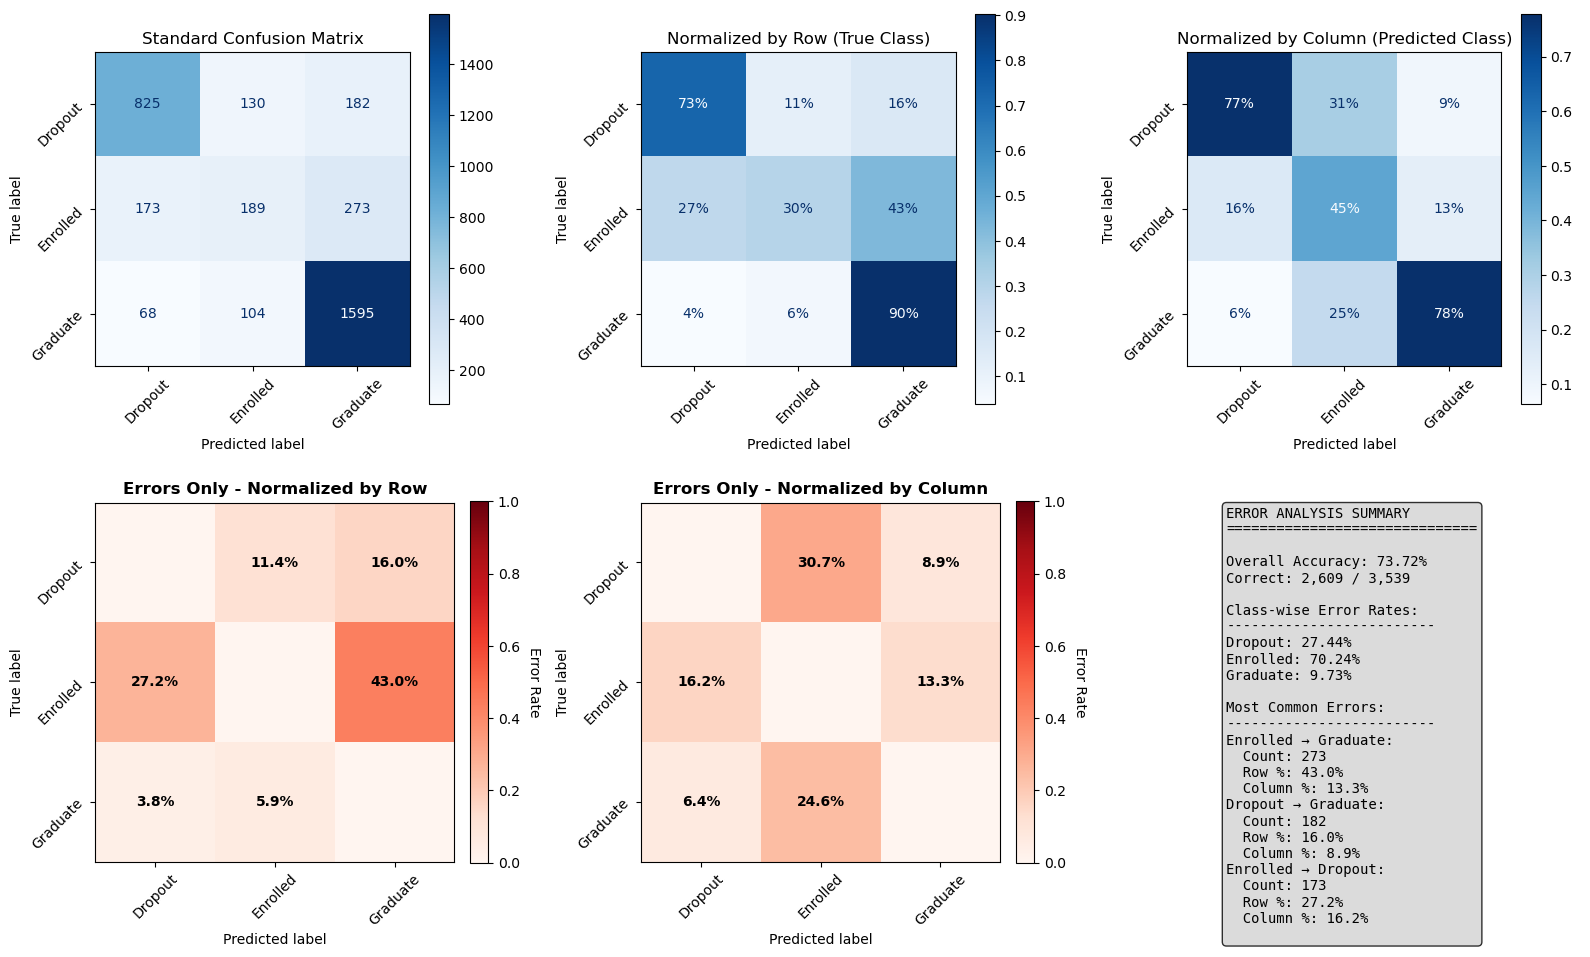


DETAILED ERROR ANALYSIS

Confusion Matrix (counts):
Rows = True Class, Columns = Predicted Class
-------------------------------------------------------
             Dropout   Enrolled   Graduate
-------------------------------------------------------
   Dropout       825       130       182   (total: 1137)
  Enrolled       173       189       273   (total: 635)
  Graduate        68       104      1595   (total: 1767)
-------------------------------------------------------
Pred Total      1066       423      2050


Error Matrix Normalized by Row (True Class):
Percentage of each true class misclassified as other classes
-------------------------------------------------------
             Dropout   Enrolled   Graduate
-------------------------------------------------------
   Dropout              11.4%    16.0%
  Enrolled    27.2%              43.0%
  Graduate     3.8%     5.9%          
-------------------------------------------------------


Error Matrix Normalized by Column (Predict

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions using cross-validation
y_train_pred = cross_val_predict(sgd_clf_scaled, X_train_scaled, y_train, cv=3)

# Get class names in sorted order (matching sklearn's default)
class_names = sorted(y_train.unique())
n_classes = len(class_names)

# Calculate confusion matrices
cm = confusion_matrix(y_train, y_train_pred, labels=class_names)

# Normalize by row (true class) and column (predicted class)
cm_normalized_row = cm.astype('float') / cm.sum(axis=1, keepdims=True)
cm_normalized_col = cm.astype('float') / cm.sum(axis=0, keepdims=True)

# Create error-only matrices (zero on diagonal)
error_matrix_row = cm_normalized_row.copy()
error_matrix_col = cm_normalized_col.copy()
np.fill_diagonal(error_matrix_row, 0)
np.fill_diagonal(error_matrix_col, 0)

# Plot all confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# ============================================
# Row 1: Standard confusion matrices
# ============================================

# Standard confusion matrix
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, 
                                        display_labels=class_names,
                                        ax=axes[0, 0],
                                        cmap='Blues', values_format='d')
axes[0, 0].set_title('Standard Confusion Matrix')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].tick_params(axis='y', rotation=45)

# Normalized by row (true class)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize="true", 
                                        values_format=".0%",
                                        display_labels=class_names,
                                        ax=axes[0, 1],
                                        cmap='Blues')
axes[0, 1].set_title('Normalized by Row (True Class)')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].tick_params(axis='y', rotation=45)

# Normalized by column (predicted class)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize="pred", 
                                        values_format=".0%",
                                        display_labels=class_names,
                                        ax=axes[0, 2],
                                        cmap='Blues')
axes[0, 2].set_title('Normalized by Column (Predicted Class)')
axes[0, 2].tick_params(axis='x', rotation=45)
axes[0, 2].tick_params(axis='y', rotation=45)

# ============================================
# Row 2: Error-only matrices (like your image)
# ============================================

# Error matrix normalized by row (errors only)
im1 = axes[1, 0].imshow(error_matrix_row, cmap='Reds', vmin=0, vmax=1)
axes[1, 0].set_title('Errors Only - Normalized by Row', fontweight='bold')
axes[1, 0].set_xlabel('Predicted label')
axes[1, 0].set_ylabel('True label')
axes[1, 0].set_xticks(range(n_classes))
axes[1, 0].set_yticks(range(n_classes))
axes[1, 0].set_xticklabels(class_names, rotation=45)
axes[1, 0].set_yticklabels(class_names, rotation=45)

# Add text annotations for error matrix by row
for i in range(n_classes):
    for j in range(n_classes):
        if i != j:  # Only show errors (off-diagonal)
            value = error_matrix_row[i, j]
            if value > 0.01:  # Only show values > 1%
                text_color = 'black' if value < 0.5 else 'white'
                axes[1, 0].text(j, i, f'{value:.1%}', 
                               ha='center', va='center', 
                               color=text_color, fontweight='bold')

# Error matrix normalized by column (errors only)
im2 = axes[1, 1].imshow(error_matrix_col, cmap='Reds', vmin=0, vmax=1)
axes[1, 1].set_title('Errors Only - Normalized by Column', fontweight='bold')
axes[1, 1].set_xlabel('Predicted label')
axes[1, 1].set_ylabel('True label')
axes[1, 1].set_xticks(range(n_classes))
axes[1, 1].set_yticks(range(n_classes))
axes[1, 1].set_xticklabels(class_names, rotation=45)
axes[1, 1].set_yticklabels(class_names, rotation=45)

# Add text annotations for error matrix by column
for i in range(n_classes):
    for j in range(n_classes):
        if i != j:  # Only show errors (off-diagonal)
            value = error_matrix_col[i, j]
            if value > 0.01:  # Only show values > 1%
                text_color = 'black' if value < 0.5 else 'white'
                axes[1, 1].text(j, i, f'{value:.1%}', 
                               ha='center', va='center', 
                               color=text_color, fontweight='bold')

# Add colorbars
cbar1 = fig.colorbar(im1, ax=axes[1, 0], fraction=0.046, pad=0.04)
cbar1.set_label('Error Rate', rotation=270, labelpad=15)
cbar2 = fig.colorbar(im2, ax=axes[1, 1], fraction=0.046, pad=0.04)
cbar2.set_label('Error Rate', rotation=270, labelpad=15)

# ============================================
# Summary statistics (in the last subplot)
# ============================================
axes[1, 2].axis('off')  # Turn off axis for text display

# Calculate summary statistics
summary_text = "ERROR ANALYSIS SUMMARY\n"
summary_text += "="*30 + "\n\n"

# Overall accuracy
total_correct = np.trace(cm)
total_samples = cm.sum()
overall_accuracy = total_correct / total_samples
summary_text += f"Overall Accuracy: {overall_accuracy:.2%}\n"
summary_text += f"Correct: {total_correct:,} / {total_samples:,}\n\n"

# Class-wise error rates
summary_text += "Class-wise Error Rates:\n"
summary_text += "-"*25 + "\n"
for i, class_name in enumerate(class_names):
    total_true = cm[i, :].sum()
    correct = cm[i, i]
    error_rate = 1 - (correct / total_true) if total_true > 0 else 0
    summary_text += f"{class_name}: {error_rate:.2%}\n"

summary_text += "\nMost Common Errors:\n"
summary_text += "-"*25 + "\n"

# Find top 3 error pairs
error_pairs = []
for i in range(n_classes):
    for j in range(n_classes):
        if i != j:
            error_pairs.append((i, j, cm[i, j]))

# Sort by error count (descending)
error_pairs.sort(key=lambda x: x[2], reverse=True)

# Show top 3
for i, j, count in error_pairs[:3]:
    true_class = class_names[i]
    pred_class = class_names[j]
    error_rate_row = error_matrix_row[i, j]
    error_rate_col = error_matrix_col[i, j]
    summary_text += f"{true_class} → {pred_class}:\n"
    summary_text += f"  Count: {count:,}\n"
    summary_text += f"  Row %: {error_rate_row:.1%}\n"
    summary_text += f"  Column %: {error_rate_col:.1%}\n"

# Display summary text
axes[1, 2].text(0.1, 0.95, summary_text, transform=axes[1, 2].transAxes,
                fontfamily='monospace', fontsize=10,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

plt.tight_layout()
plt.show()

# ============================================
# Additional detailed analysis
# ============================================
print("\n" + "="*50)
print("DETAILED ERROR ANALYSIS")
print("="*50)

print(f"\nConfusion Matrix (counts):")
print("Rows = True Class, Columns = Predicted Class")
print("-" * (15 * n_classes + 10))
header = " " * 10 + " ".join([f"{name:>10}" for name in class_names])
print(header)
print("-" * (15 * n_classes + 10))
for i, true_name in enumerate(class_names):
    row = f"{true_name:>10}"
    for j in range(n_classes):
        row += f"{cm[i, j]:>10}"
    if i < n_classes - 1:
        row += f"   (total: {cm[i,:].sum()})"
    else:
        row += f"   (total: {cm[i,:].sum()})"
    print(row)
print("-" * (15 * n_classes + 10))
col_totals = cm.sum(axis=0)
footer = "Pred Total"
for j in range(n_classes):
    footer += f"{col_totals[j]:>10}"
print(footer)

print(f"\n\nError Matrix Normalized by Row (True Class):")
print("Percentage of each true class misclassified as other classes")
print("-" * (15 * n_classes + 10))
print(header)
print("-" * (15 * n_classes + 10))
for i, true_name in enumerate(class_names):
    row = f"{true_name:>10}"
    for j in range(n_classes):
        if i == j:
            row += " " * 10
        else:
            row += f"{error_matrix_row[i, j]:>9.1%}"
    print(row)
print("-" * (15 * n_classes + 10))

print(f"\n\nError Matrix Normalized by Column (Predicted Class):")
print("Percentage of each prediction that are actually other classes")
print("-" * (15 * n_classes + 10))
print(header)
print("-" * (15 * n_classes + 10))
for i, true_name in enumerate(class_names):
    row = f"{true_name:>10}"
    for j in range(n_classes):
        if i == j:
            row += " " * 10
        else:
            row += f"{error_matrix_col[i, j]:>9.1%}"
    print(row)
print("-" * (15 * n_classes + 10))

## Step 12: Final Model Evaluation on Test Set

Training final model on full training set...

FINAL MODEL EVALUATION ON TEST SET

📊 OVERALL PERFORMANCE:
  Test Set Accuracy:    0.7356 (73.56%)
  Train Set Accuracy:   0.7372 (73.72%)
  Train-Test Gap:       0.0016
  Generalization:       ✅ Excellent generalization

CLASSIFICATION REPORT (Weighted Averages):

  Precision: 0.7001
  Recall:    0.7356
  F1-Score:  0.7065

DETAILED CLASS-WISE METRICS:
              precision    recall  f1-score   support

     Dropout       0.74      0.77      0.76       284
    Enrolled       0.42      0.18      0.25       159
    Graduate       0.77      0.91      0.84       442

    accuracy                           0.74       885
   macro avg       0.65      0.62      0.62       885
weighted avg       0.70      0.74      0.71       885



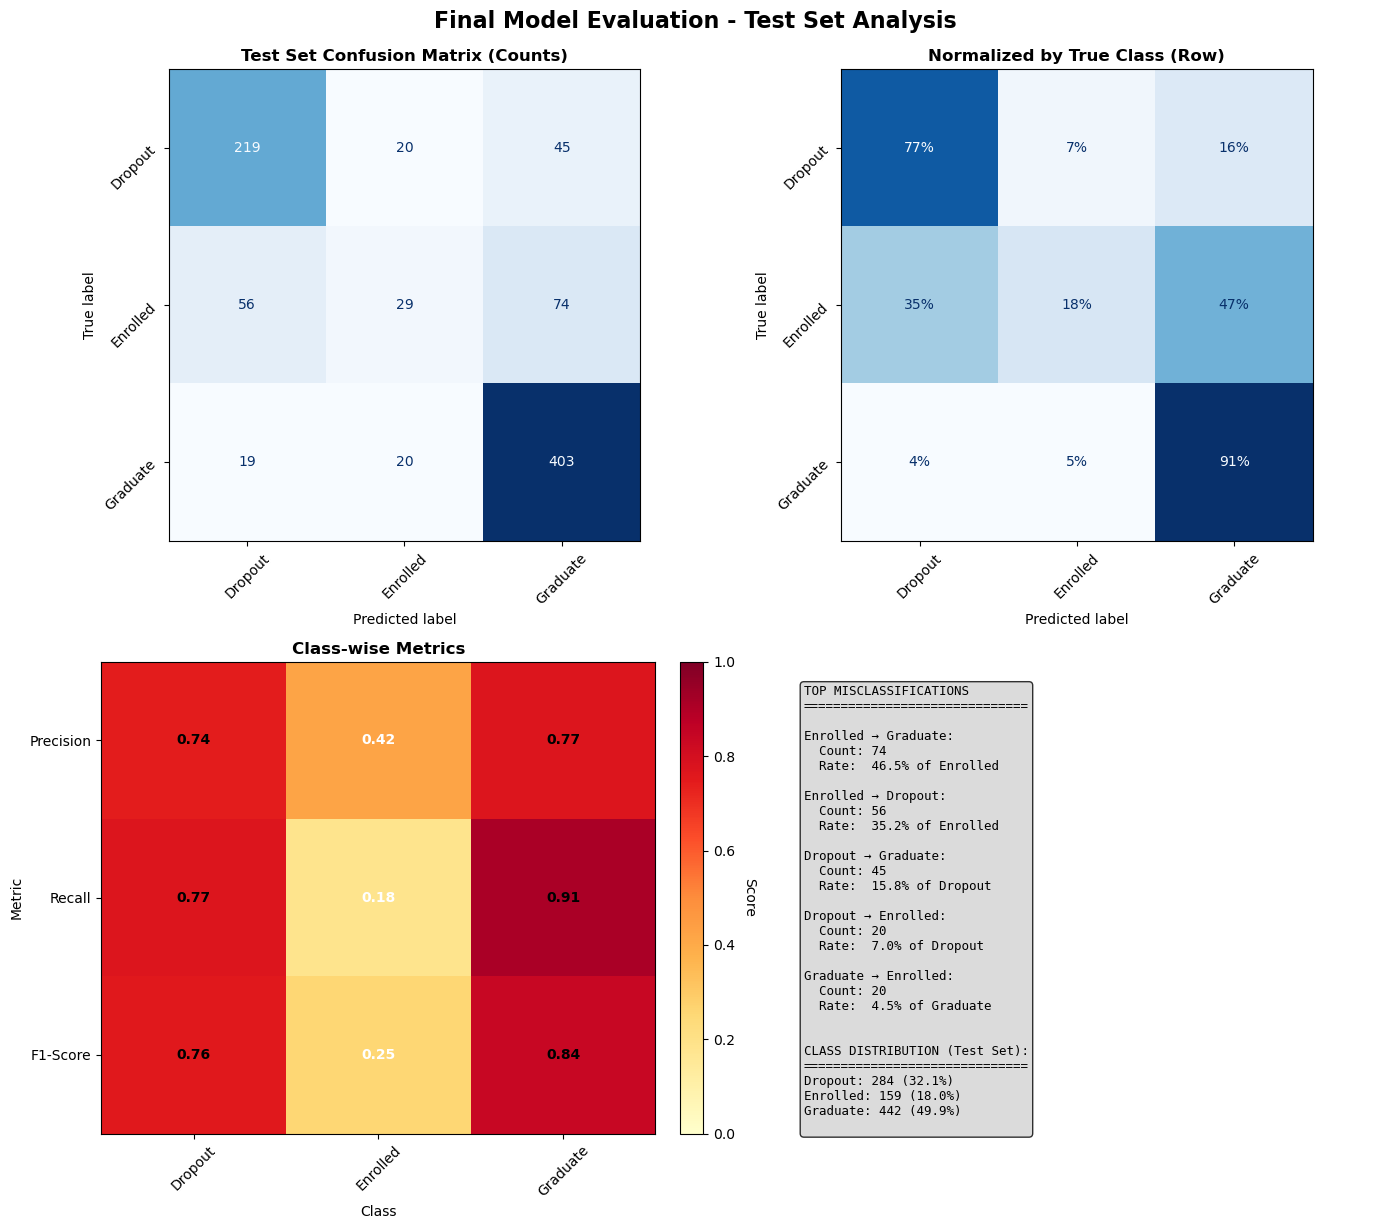


DECISION SCORE ANALYSIS:


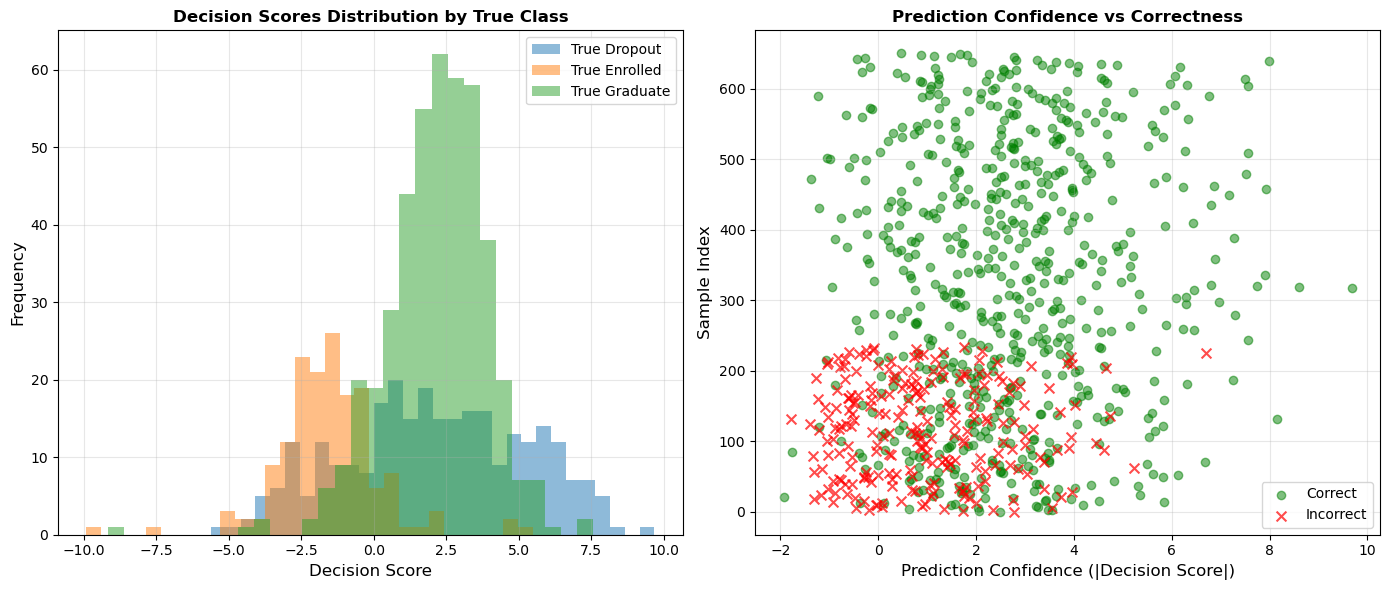


Confidence Score Analysis:
  Mean confidence (correct predictions):   2.6662
  Mean confidence (incorrect predictions): 0.9650
  ✓ Model is more confident when it's correct

PERFORMANCE SUMMARY:

Metric               Train       Test   Difference
--------------------------------------------------
Accuracy            0.7372     0.7356      +0.0016
Precision           0.7173     0.7001      +0.0172
Recall              0.7372     0.7356      +0.0016
F1-Score            0.7220     0.7065      +0.0156

MODEL ASSESSMENT:

🎯 Overall Assessment:
   Test Accuracy: 73.6%
   ⚠️ Acceptable performance

🔍 Generalization Assessment:
   ✅ Excellent generalization

⚙️  Model Configuration:
   Loss function: log_loss
   ✓ Supports probability estimates

📈 Next Steps:
   - Focus on improving F1-score for imbalanced classes
   - Try class weighting (class_weight='balanced')
   - Use different evaluation metrics for imbalanced data

MODEL PARAMETERS:

SGDClassifier Parameters:
  Loss:          log_loss
 

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, classification_report, 
                           confusion_matrix, ConfusionMatrixDisplay,
                           precision_score, recall_score, f1_score)
# Remove roc_auc_score import since we won't use it without probabilities

# Train final model on full training set - CHANGED: Using log_loss for probabilities
print("Training final model on full training set...")
final_model = SGDClassifier(random_state=42, max_iter=1000, loss='log_loss')  # CHANGED: log_loss for probabilities
final_model.fit(X_train_scaled, y_train)

# Evaluate on test set
y_test_pred = final_model.predict(X_test_scaled)

# Get decision scores instead of probabilities for SGDClassifier
try:
    y_test_scores = final_model.decision_function(X_test_scaled)
    has_scores = True
except:
    y_test_scores = None
    has_scores = False

# Get class names
class_names = sorted(y_test.unique())
n_classes = len(class_names)

print("\n" + "="*60)
print("FINAL MODEL EVALUATION ON TEST SET")
print("="*60)

# ============================================
# 1. Overall Metrics
# ============================================
test_accuracy = accuracy_score(y_test, y_test_pred)
# Get y_train_pred from previous steps or compute it
try:
    train_accuracy = accuracy_score(y_train, y_train_pred)  # Assuming y_train_pred exists
except NameError:
    # Compute train accuracy if not available
    y_train_pred = final_model.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"\n📊 OVERALL PERFORMANCE:")
print(f"  Test Set Accuracy:    {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"  Train Set Accuracy:   {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"  Train-Test Gap:       {abs(train_accuracy - test_accuracy):.4f}")

# Determine overfitting status
gap = abs(train_accuracy - test_accuracy)
if gap < 0.02:
    generalization = "✅ Excellent generalization"
elif gap < 0.05:
    generalization = "✓ Good generalization"
elif gap < 0.10:
    generalization = "⚠️ Moderate overfitting risk"
else:
    generalization = "❌ Possible overfitting"
print(f"  Generalization:       {generalization}")

# ============================================
# 2. Detailed Classification Report
# ============================================
print("\n" + "="*60)
print("CLASSIFICATION REPORT (Weighted Averages):")
print("="*60)

report = classification_report(y_test, y_test_pred, 
                              target_names=class_names,
                              output_dict=True)

# Extract weighted averages
weighted_precision = report['weighted avg']['precision']
weighted_recall = report['weighted avg']['recall']
weighted_f1 = report['weighted avg']['f1-score']

print(f"\n  Precision: {weighted_precision:.4f}")
print(f"  Recall:    {weighted_recall:.4f}")
print(f"  F1-Score:  {weighted_f1:.4f}")

print("\n" + "="*60)
print("DETAILED CLASS-WISE METRICS:")
print("="*60)
print(classification_report(y_test, y_test_pred, target_names=class_names))

# ============================================
# 3. Enhanced Confusion Matrix Analysis
# ============================================
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Standard confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred,
                                        display_labels=class_names,
                                        ax=axes[0, 0],
                                        cmap='Blues', values_format='d',
                                        colorbar=False)
axes[0, 0].set_title('Test Set Confusion Matrix (Counts)', fontweight='bold')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].tick_params(axis='y', rotation=45)

# Normalized by row
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred,
                                        normalize="true",
                                        values_format=".0%",
                                        display_labels=class_names,
                                        ax=axes[0, 1],
                                        cmap='Blues',
                                        colorbar=False)
axes[0, 1].set_title('Normalized by True Class (Row)', fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].tick_params(axis='y', rotation=45)

# Calculate class-wise metrics for heatmap
cm = confusion_matrix(y_test, y_test_pred, labels=class_names)

# Create precision-recall-F1 heatmap
class_metrics = []
for i, class_name in enumerate(class_names):
    # Precision for this class (column i)
    precision = precision_score(y_test == class_name, y_test_pred == class_name, 
                               zero_division=0)
    # Recall for this class (row i)
    recall = recall_score(y_test == class_name, y_test_pred == class_name,
                         zero_division=0)
    # F1 for this class
    f1 = f1_score(y_test == class_name, y_test_pred == class_name,
                 zero_division=0)
    
    class_metrics.append([precision, recall, f1])

metrics_array = np.array(class_metrics)
metrics_labels = ['Precision', 'Recall', 'F1-Score']

# Metrics heatmap
im = axes[1, 0].imshow(metrics_array.T, cmap='YlOrRd', aspect='auto', vmin=0, vmax=1)
axes[1, 0].set_title('Class-wise Metrics', fontweight='bold')
axes[1, 0].set_xlabel('Class')
axes[1, 0].set_ylabel('Metric')
axes[1, 0].set_xticks(range(n_classes))
axes[1, 0].set_yticks(range(3))
axes[1, 0].set_xticklabels(class_names, rotation=45)
axes[1, 0].set_yticklabels(metrics_labels)

# Add values to heatmap
for i in range(n_classes):
    for j in range(3):
        value = metrics_array[i, j]
        color = 'white' if value < 0.5 else 'black'
        axes[1, 0].text(i, j, f'{value:.2f}', 
                       ha='center', va='center', 
                       color=color, fontweight='bold')

# Add colorbar
cbar = plt.colorbar(im, ax=axes[1, 0], fraction=0.046, pad=0.04)
cbar.set_label('Score', rotation=270, labelpad=15)

# Error analysis - most common misclassifications
axes[1, 1].axis('off')  # Turn off for text display

# Find top error pairs
error_pairs = []
for i in range(n_classes):
    for j in range(n_classes):
        if i != j and cm[i, j] > 0:
            true_class = class_names[i]
            pred_class = class_names[j]
            error_pairs.append((true_class, pred_class, cm[i, j]))

# Sort by error count
error_pairs.sort(key=lambda x: x[2], reverse=True)

# Create summary text
error_text = "TOP MISCLASSIFICATIONS\n"
error_text += "="*30 + "\n\n"

if error_pairs:
    for true_class, pred_class, count in error_pairs[:5]:  # Top 5
        total_true = cm[class_names.index(true_class), :].sum()
        error_rate = count / total_true * 100 if total_true > 0 else 0
        error_text += f"{true_class} → {pred_class}:\n"
        error_text += f"  Count: {count:,}\n"
        error_text += f"  Rate:  {error_rate:.1f}% of {true_class}\n\n"
else:
    error_text += "No misclassifications found!\n"

# Add class distribution info
error_text += "\nCLASS DISTRIBUTION (Test Set):\n"
error_text += "="*30 + "\n"
for i, class_name in enumerate(class_names):
    count = cm[i, :].sum()
    percentage = count / cm.sum() * 100
    error_text += f"{class_name}: {count:,} ({percentage:.1f}%)\n"

axes[1, 1].text(0.05, 0.95, error_text, transform=axes[1, 1].transAxes,
                fontfamily='monospace', fontsize=9,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

plt.tight_layout()
plt.suptitle('Final Model Evaluation - Test Set Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# ============================================
# 4. Decision Score Analysis (instead of ROC curves)
# ============================================
if has_scores and y_test_scores is not None:
    print("\n" + "="*60)
    print("DECISION SCORE ANALYSIS:")
    print("="*60)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot decision scores distribution by true class
    for i, class_name in enumerate(class_names):
        class_mask = (y_test == class_name)
        class_scores = y_test_scores[class_mask]
        
        if n_classes == 2:
            # Binary classification - single score per sample
            axes[0].hist(class_scores, bins=30, alpha=0.5, label=f'True {class_name}')
        else:
            # Multiclass - scores for each class
            # For multiclass with decision_function, we get scores for all classes
            if len(class_scores.shape) > 1 and class_scores.shape[1] == n_classes:
                # Plot scores for this class against itself
                scores_for_class = class_scores[:, i]
                axes[0].hist(scores_for_class, bins=30, alpha=0.5, label=f'True {class_name}')
    
    axes[0].set_xlabel('Decision Score', fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].set_title('Decision Scores Distribution by True Class', fontweight='bold')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Plot decision scores vs prediction confidence
    if len(y_test_scores.shape) > 1:
        # For multiclass, get max score and corresponding prediction
        max_scores = np.max(y_test_scores, axis=1)
        prediction_confidence = max_scores
    else:
        # For binary, use absolute values
        prediction_confidence = np.abs(y_test_scores)
    
    correct_mask = (y_test_pred == y_test)
    
    axes[1].scatter(prediction_confidence[correct_mask], 
                    range(len(prediction_confidence[correct_mask])),
                    alpha=0.5, label='Correct', color='green')
    axes[1].scatter(prediction_confidence[~correct_mask], 
                    range(len(prediction_confidence[~correct_mask])),
                    alpha=0.7, label='Incorrect', color='red', marker='x', s=50)
    
    axes[1].set_xlabel('Prediction Confidence (|Decision Score|)', fontsize=12)
    axes[1].set_ylabel('Sample Index', fontsize=12)
    axes[1].set_title('Prediction Confidence vs Correctness', fontweight='bold')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Analyze confidence scores
    print("\nConfidence Score Analysis:")
    mean_confidence_correct = np.mean(prediction_confidence[correct_mask]) if np.any(correct_mask) else 0
    mean_confidence_incorrect = np.mean(prediction_confidence[~correct_mask]) if np.any(~correct_mask) else 0
    
    print(f"  Mean confidence (correct predictions):   {mean_confidence_correct:.4f}")
    print(f"  Mean confidence (incorrect predictions): {mean_confidence_incorrect:.4f}")
    
    if mean_confidence_correct > mean_confidence_incorrect:
        print("  ✓ Model is more confident when it's correct")
    else:
        print("  ⚠️ Model confidence doesn't correlate well with correctness")

# ============================================
# 5. Performance Comparison Table
# ============================================
print("\n" + "="*60)
print("PERFORMANCE SUMMARY:")
print("="*60)

# Calculate all metrics for train set
train_precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
train_recall = recall_score(y_train, y_train_pred, average='weighted', zero_division=0)
train_f1 = f1_score(y_train, y_train_pred, average='weighted', zero_division=0)

# Calculate all metrics for test set
test_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
test_recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
test_f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

# Create comparison table
print(f"\n{'Metric':<15} {'Train':>10} {'Test':>10} {'Difference':>12}")
print("-" * 50)

metrics_to_compare = [
    ('Accuracy', train_accuracy, test_accuracy),
    ('Precision', train_precision, test_precision),
    ('Recall', train_recall, test_recall),
    ('F1-Score', train_f1, test_f1),
]

for metric_name, train_val, test_val in metrics_to_compare:
    diff = train_val - test_val
    diff_str = f"{diff:+.4f}" if diff >= 0 else f"{diff:.4f}"
    diff_color = "green" if abs(diff) < 0.05 else "orange" if abs(diff) < 0.1 else "red"
    
    print(f"{metric_name:<15} {train_val:>10.4f} {test_val:>10.4f} {diff_str:>12}")

print("\n" + "="*60)
print("MODEL ASSESSMENT:")
print("="*60)

# Final assessment
print(f"\n🎯 Overall Assessment:")
print(f"   Test Accuracy: {test_accuracy*100:.1f}%")

if test_accuracy > 0.9:
    print("   ✅ Excellent performance")
elif test_accuracy > 0.8:
    print("   ✓ Good performance")
elif test_accuracy > 0.7:
    print("   ⚠️ Acceptable performance")
elif test_accuracy > 0.6:
    print("   ⚠️ Below average performance")
else:
    print("   ❌ Poor performance - consider different model")

print(f"\n🔍 Generalization Assessment:")
if gap < 0.02:
    print("   ✅ Excellent generalization")
elif gap < 0.05:
    print("   ✓ Good generalization")
elif gap < 0.10:
    print("   ⚠️ Moderate overfitting risk")
else:
    print("   ❌ Significant overfitting detected")

# Model-specific assessment based on loss function
print(f"\n⚙️  Model Configuration:")
print(f"   Loss function: {final_model.loss}")
if final_model.loss == 'log_loss':
    print("   ✓ Supports probability estimates")
else:
    print("   ⚠️ Does not support probability estimates (use 'log_loss' or 'modified_huber')")

print(f"\n📈 Next Steps:")
if test_accuracy < 0.7:
    print("   - Consider more complex model or feature engineering")
    print("   - Try different loss functions in SGDClassifier")
    print("   - Increase max_iter or adjust learning rate")
elif gap > 0.1:
    print("   - Address overfitting with regularization (alpha parameter)")
    print("   - Try different penalty types (l1, l2, elasticnet)")
    print("   - Consider collecting more training data")
elif weighted_f1 < 0.8:
    print("   - Focus on improving F1-score for imbalanced classes")
    print("   - Try class weighting (class_weight='balanced')")
    print("   - Use different evaluation metrics for imbalanced data")
else:
    print("   - Model is ready for deployment!")
    print("   - Consider tuning hyperparameters for marginal improvements")

# ============================================
# 6. Model Parameter Analysis
# ============================================
print("\n" + "="*60)
print("MODEL PARAMETERS:")
print("="*60)

print(f"\nSGDClassifier Parameters:")
print(f"  Loss:          {final_model.loss}")
print(f"  Penalty:       {final_model.penalty}")
print(f"  Alpha:         {final_model.alpha}")
print(f"  Max iterations:{final_model.max_iter}")
print(f"  Learning rate: {final_model.learning_rate}")
print(f"  Eta0:          {final_model.eta0}")

# Show coefficient magnitudes for feature importance (if interpretable)
if final_model.loss == 'log_loss':  # Logistic regression
    print(f"\nFeature Importance (top 10 coefficients by magnitude):")
    # Assuming X_train is a DataFrame with column names
    try:
        if hasattr(X_train, 'columns'):
            feature_names = X_train.columns
            coef_abs = np.abs(final_model.coef_)
            
            # For multiclass, average across classes
            if len(coef_abs.shape) > 1:
                coef_abs = coef_abs.mean(axis=0)
            
            # Get top 10 features
            top_indices = np.argsort(coef_abs)[-10:][::-1]
            
            for idx in top_indices:
                feature_name = feature_names[idx]
                importance = coef_abs[idx]
                print(f"  {feature_name}: {importance:.4f}")
    except:
        print("  (Feature names not available or model not interpretable)")

### Additional Advanced Topics


## Step 13: Multilabel Classification

In [15]:
# Create multiple binary labels for each student
# Example: Is the student at risk? (Dropout or Enrolled) AND Is the student successful? (Graduate)

from sklearn.neighbors import KNeighborsClassifier

# Create multilabel targets
# Label 1: Is the student at risk? (Dropout or Enrolled = True, Graduate = False)
y_train_at_risk = (y_train != 'Graduate')
# Label 2: Is the student a graduate? (Graduate = True, others = False)
y_train_graduate = (y_train == 'Graduate')
# Combine into multilabel format
y_multilabel = np.c_[y_train_at_risk, y_train_graduate]

print("Multilabel Classification Example:")
print("="*50)
print("Creating two labels for each student:")
print("  Label 1: At Risk (Dropout or Enrolled)")
print("  Label 2: Graduate")
print(f"\nMultilabel shape: {y_multilabel.shape}")
print(f"\nFirst 10 examples:")
for i in range(10):
    print(f"  Student {i+1}: At Risk={y_multilabel[i,0]}, Graduate={y_multilabel[i,1]} (Actual: {y_train.iloc[i]})")

# Train KNN for multilabel classification (supports multilabel natively)
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_scaled, y_multilabel)

# Make a prediction
some_student = X_train_scaled[0:1]
prediction = knn_clf.predict(some_student)
print(f"\nPrediction for first student:")
print(f"  At Risk: {prediction[0, 0]}, Graduate: {prediction[0, 1]}")
print(f"  Actual: At Risk={y_multilabel[0, 0]}, Graduate={y_multilabel[0, 1]}")


Multilabel Classification Example:
Creating two labels for each student:
  Label 1: At Risk (Dropout or Enrolled)
  Label 2: Graduate

Multilabel shape: (3539, 2)

First 10 examples:
  Student 1: At Risk=False, Graduate=True (Actual: Graduate)
  Student 2: At Risk=True, Graduate=False (Actual: Dropout)
  Student 3: At Risk=True, Graduate=False (Actual: Enrolled)
  Student 4: At Risk=False, Graduate=True (Actual: Graduate)
  Student 5: At Risk=False, Graduate=True (Actual: Graduate)
  Student 6: At Risk=True, Graduate=False (Actual: Enrolled)
  Student 7: At Risk=True, Graduate=False (Actual: Dropout)
  Student 8: At Risk=True, Graduate=False (Actual: Dropout)
  Student 9: At Risk=True, Graduate=False (Actual: Dropout)
  Student 10: At Risk=True, Graduate=False (Actual: Dropout)

Prediction for first student:
  At Risk: False, Graduate: True
  Actual: At Risk=False, Graduate=True


c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [16]:
# Evaluate multilabel classifier
y_train_knn_pred = cross_val_predict(knn_clf, X_train_scaled, y_multilabel, cv=3)

# Calculate F1 score for multilabel (macro average - treats all labels equally)
f1_macro = f1_score(y_multilabel, y_train_knn_pred, average="macro")
print(f"Multilabel F1 Score (macro average): {f1_macro:.4f}")

# Calculate F1 score with weighted average (weights by support)
f1_weighted = f1_score(y_multilabel, y_train_knn_pred, average="weighted")
print(f"Multilabel F1 Score (weighted average): {f1_weighted:.4f}")

# Calculate F1 score per label
f1_per_label = f1_score(y_multilabel, y_train_knn_pred, average=None)
print(f"\nF1 Score per label:")
print(f"  Label 1 (At Risk): {f1_per_label[0]:.4f}")
print(f"  Label 2 (Graduate): {f1_per_label[1]:.4f}")

# Using ClassifierChain for multilabel classification
from sklearn.multioutput import ClassifierChain
from sklearn.svm import SVC

# Create a chain classifier (each model uses predictions from previous models)
print("\n" + "="*50)
print("Training ClassifierChain (models in sequence):")
print("="*50)
chain_clf = ClassifierChain(SVC(random_state=42, probability=True), cv=3, random_state=42)
chain_clf.fit(X_train_scaled[:1000], y_multilabel[:1000])  # Using subset for speed

chain_prediction = chain_clf.predict(some_student)
print(f"Chain prediction for first student:")
print(f"  At Risk: {chain_prediction[0, 0]}, Graduate: {chain_prediction[0, 1]}")


Multilabel F1 Score (macro average): 0.7559
Multilabel F1 Score (weighted average): 0.7558

F1 Score per label:
  Label 1 (At Risk): 0.7355
  Label 2 (Graduate): 0.7762

Training ClassifierChain (models in sequence):
Chain prediction for first student:
  At Risk: 0.0, Graduate: 1.0


## Step 14: Model Comparison and Feature Importance


Training and comparing multiple models...
SGD Classifier      : 0.7372 (+/- 0.0115)
Random Forest       : 0.7632 (+/- 0.0196)
Logistic Regression : 0.7601 (+/- 0.0205)
Naive Bayes         : 0.6714 (+/- 0.0183)

Best model: Random Forest (CV accuracy: 0.7632)


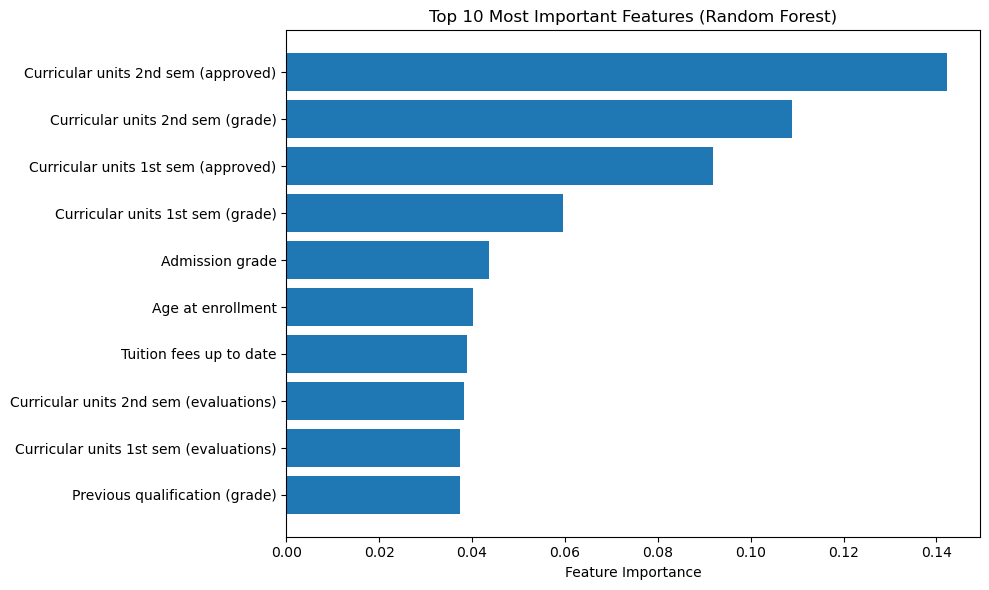


Top 10 Most Important Features:
 1. Curricular units 2nd sem (approved)     : 0.1423
 2. Curricular units 2nd sem (grade)        : 0.1090
 3. Curricular units 1st sem (approved)     : 0.0919
 4. Curricular units 1st sem (grade)        : 0.0596
 5. Admission grade                         : 0.0436
 6. Age at enrollment                       : 0.0403
 7. Tuition fees up to date                 : 0.0389
 8. Curricular units 2nd sem (evaluations)  : 0.0382
 9. Curricular units 1st sem (evaluations)  : 0.0375
10. Previous qualification (grade)          : 0.0375


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Train multiple models for comparison
models = {
    'SGD Classifier': SGDClassifier(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Naive Bayes': GaussianNB()
}

print("Training and comparing multiple models...")
print("="*50)

results = {}
for name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=3, scoring="accuracy")
    results[name] = {
        'model': model,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }
    print(f"{name:20s}: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Find best model
best_model_name = max(results, key=lambda x: results[x]['cv_mean'])
print(f"\nBest model: {best_model_name} (CV accuracy: {results[best_model_name]['cv_mean']:.4f})")

# Feature importance (for Random Forest)
rf_model = results['Random Forest']['model']
feature_importance = rf_model.feature_importances_
feature_names = X_train.columns

# Get top 10 most important features
indices = np.argsort(feature_importance)[::-1][:10]

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), feature_importance[indices])
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Top 10 Most Important Features (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
for i, idx in enumerate(indices, 1):
    print(f"{i:2d}. {feature_names[idx]:40s}: {feature_importance[idx]:.4f}")


## Step 15: Hyperparameter Tuning


In [18]:
from sklearn.model_selection import GridSearchCV

# Grid search for SGD Classifier
print("Performing Grid Search for SGD Classifier...")
print("="*50)

param_grid = {
    'loss': ['hinge', 'log_loss', 'modified_huber'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'optimal', 'adaptive'],
    'eta0': [0.01, 0.1]
}

# Use a smaller subset for faster grid search
sgd_grid = SGDClassifier(random_state=42, max_iter=1000)
grid_search = GridSearchCV(sgd_grid, param_grid, cv=3, scoring='accuracy', 
                          n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled[:2000], y_train[:2000])  # Using subset for speed

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Train best model on full training set
best_sgd = grid_search.best_estimator_
best_sgd.fit(X_train_scaled, y_train)

# Evaluate on test set
y_test_pred_best = best_sgd.predict(X_test_scaled)
test_accuracy_best = accuracy_score(y_test, y_test_pred_best)

print(f"\nTest set accuracy with tuned model: {test_accuracy_best:.4f} ({test_accuracy_best*100:.2f}%)")
print(f"Test set accuracy with default model: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Improvement: {(test_accuracy_best - test_accuracy)*100:.2f}%")


Performing Grid Search for SGD Classifier...
Fitting 3 folds for each of 54 candidates, totalling 162 fits

Best parameters: {'alpha': 0.001, 'eta0': 0.01, 'learning_rate': 'adaptive', 'loss': 'log_loss'}
Best cross-validation score: 0.7565

Test set accuracy with tuned model: 0.7616 (76.16%)
Test set accuracy with default model: 0.7356 (73.56%)
Improvement: 2.60%


## Step 16: Visualizing Decision Boundaries (2D Projection)


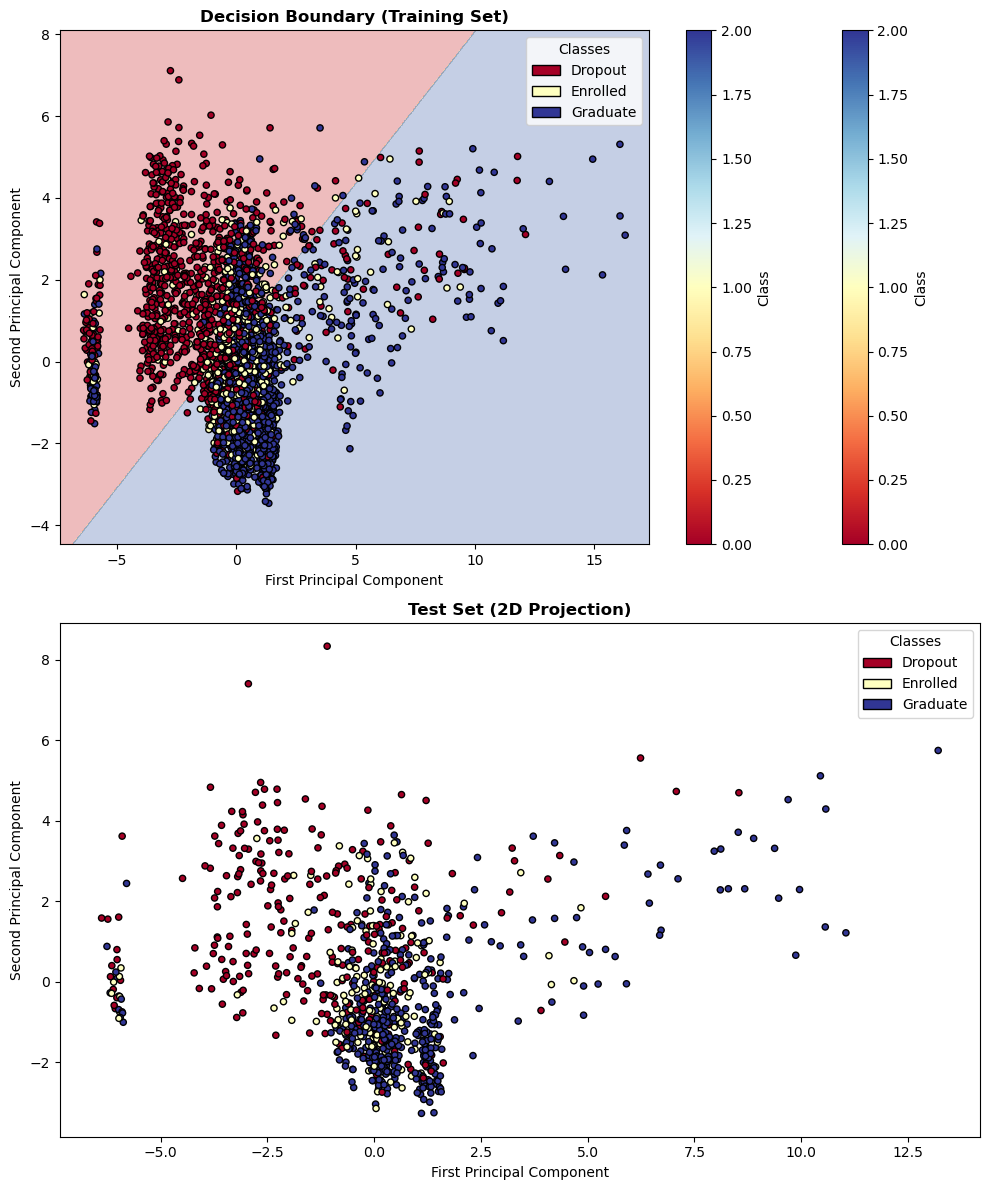

Variance explained by first 2 components: 27.64%
  Component 1: 17.70%
  Component 2: 9.94%


In [19]:
# Use PCA to reduce to 2D for visualization
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Reduce dimensions to 2D
pca = PCA(n_components=2, random_state=42)
X_train_2d = pca.fit_transform(X_train_scaled)
X_test_2d = pca.transform(X_test_scaled)

# Train a classifier on 2D data
clf_2d = SGDClassifier(random_state=42, max_iter=1000)
clf_2d.fit(X_train_2d, y_train)

# Create a mesh for decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on mesh
Z = clf_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = LabelEncoder().fit_transform(Z)
Z = Z.reshape(xx.shape)

# Plot decision boundary (stacked vertically for better visibility)
plt.figure(figsize=(10, 12))

# Create LabelEncoder to get consistent mapping (alphabetical order: Dropout=0, Enrolled=1, Graduate=2)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
# Color mapping: Dropout=0 (Red), Enrolled=1 (Yellow), Graduate=2 (Blue) in RdYlBu colormap
cmap = plt.cm.RdYlBu
colors = [cmap(0.0), cmap(0.5), cmap(1.0)]  # Red, Yellow, Blue
class_names = ['Dropout', 'Enrolled', 'Graduate']

plt.subplot(2, 1, 1)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train_encoded, 
                     cmap=plt.cm.RdYlBu, edgecolors='black', s=20)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Decision Boundary (Training Set)', fontweight='bold')
plt.colorbar(scatter, label='Class')
# Create proper legend with color patches
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[i], edgecolor='black', label=class_names[i]) 
                   for i in range(len(class_names))]
plt.legend(handles=legend_elements, loc='best', title='Classes')

plt.subplot(2, 1, 2)
y_test_encoded = le.transform(y_test)  # Use the same encoder
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test_encoded, 
           cmap=plt.cm.RdYlBu, edgecolors='black', s=20)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Test Set (2D Projection)', fontweight='bold')
plt.colorbar(scatter, label='Class')
# Add legend to second plot as well
plt.legend(handles=legend_elements, loc='best', title='Classes')

plt.tight_layout()
plt.show()

print(f"Variance explained by first 2 components: {pca.explained_variance_ratio_.sum():.2%}")
print(f"  Component 1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"  Component 2: {pca.explained_variance_ratio_[1]:.2%}")


## Summary

This notebook covered the complete classification pipeline:

1. **Data Loading and Exploration**: Loaded and explored the student dropout dataset
2. **Train/Test Split**: Created stratified splits to maintain class distribution
3. **Binary Classification**: Trained a dropout detector (similar to MNIST's 5-detector)
4. **Cross-Validation**: Evaluated model performance using k-fold CV
5. **Confusion Matrix**: Analyzed classification errors
6. **Precision, Recall, F1**: Calculated detailed performance metrics
7. **Precision-Recall Trade-off**: Analyzed threshold selection
8. **ROC Curve**: Evaluated classifier using ROC AUC
9. **Multiclass Classification**: Extended to all three classes
10. **Feature Scaling**: Improved performance with StandardScaler
11. **Error Analysis**: Deep dive into classification errors
12. **Final Evaluation**: Test set performance assessment
13. **Multilabel Classification**: Multiple labels per instance
14. **Model Comparison**: Compared multiple algorithms and feature importance
15. **Hyperparameter Tuning**: Grid search for optimal parameters
16. **Visualization**: 2D projection and decision boundaries

### Key Findings:
- The dataset has 3 classes: Dropout, Enrolled, and Graduate
- Feature scaling significantly improves SGD classifier performance
- The model can be tuned for precision/recall trade-off based on requirements
- Random Forest provides feature importance insights
- Hyperparameter tuning can improve model performance
